In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp


red = ff0000
grey = cccccc
black = 333333

In [2]:
#read in the list of videos contained in the csv
df = pd.read_pickle('prepared.pkl')

## Combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


In [3]:
df.drop(columns='description').to_csv('combined_csv.csv')

In [4]:
df[df.duplicated(['video_id']) ==True]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,title_lengths,desc_lengths,tags_length,content_rate,views_per_sub


## Engagement

In [5]:
df = df.sort_values(by='rank').drop_duplicates(['video_id']).reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

In [7]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
     title='JP and KR with lowest overall engagement. India with largest jump')



/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 739.584x316.8 with 1 Axes>

In [8]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
        row='categoryId', sharey=False,
        title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 739.584x2592 with 15 Axes>

In [9]:
dxp.bar(x='engagement', y='categoryId',split='top_25', data=df, aggfunc='median', orientation='h',\
     title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 388.8x691.2 with 1 Axes>

## Sponsored?


<AxesSubplot:ylabel='Frequency'>

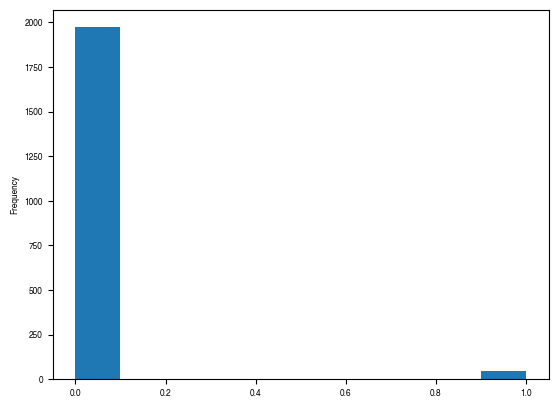

In [10]:
df.sponsored.plot.hist()

<AxesSubplot:>

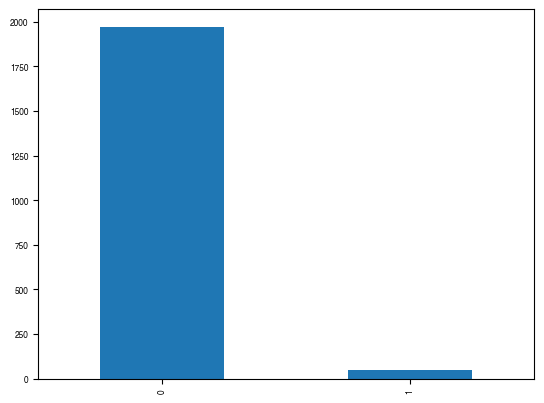

In [11]:
df.sponsored.value_counts().plot.bar()

## Video Region

Takeaways 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


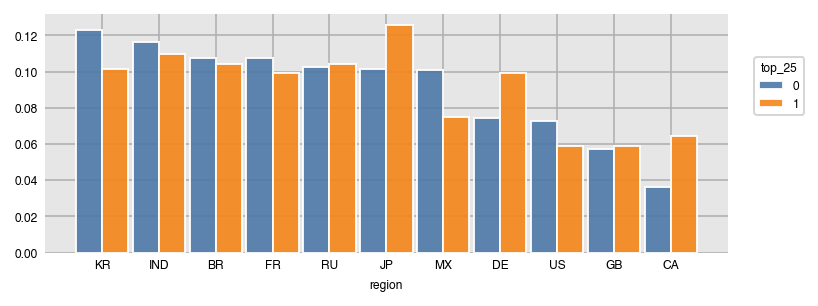

In [12]:
dxp.count('region', data=df, split='top_25', normalize='top_25')

In [13]:
df.categoryId.unique()

array(['Entertainment', 'Science_Technology', 'Gaming', 'News_Politics',
       'Film_Animation', 'Sports', 'People_Blogs', 'Comedy', 'Music',
       'Education', 'Autos_Vehicles', 'Howto_Style', 'Travel_Events',
       'Pets_Animals', 'Nonprofits_Activism'], dtype=object)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


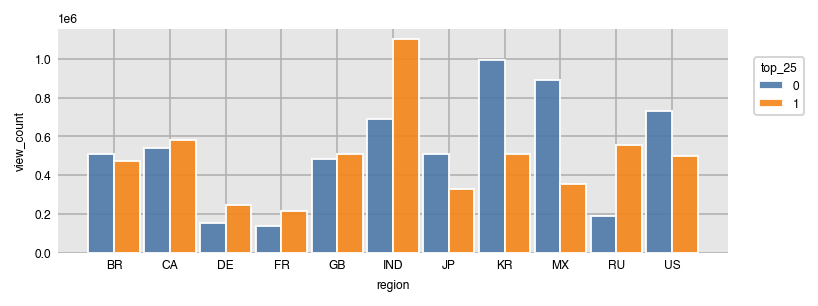

In [14]:
dxp.bar(x='region', y='view_count',split='top_25', data=df, aggfunc='median',\
     title='')

## Percent of capital letters in title 


## When we talk about subscribers we can take a look at age of channel


## How to drive up subscribers is a slightly separate question but we can ask it


## At what point does the video view count pass the subscriber view count


## Let’s think about tags and how many words they have in common with the descriptions


In [15]:
word_vault = list()
for row in df.index:
   word_vault.extend(df.iloc[row].word_bank)

In [16]:
top_25_words = list()
for row in df[df.top_25==1].index:
    top_25_words.extend(df[df.top_25==1].loc[row].word_bank)

In [17]:
outside_25_words = list()
for row in df[df.top_25!=1].index:
    outside_25_words.extend(df[df.top_25!=1].loc[row].word_bank)
    

In [18]:
testy = ''.join(word_vault)

(-0.5, 399.5, 199.5, -0.5)

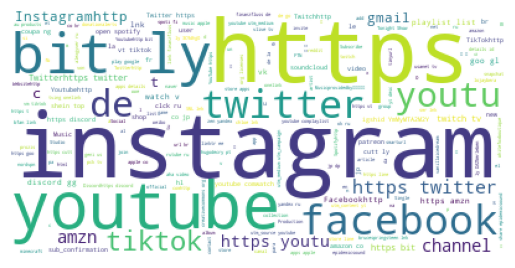

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

img = WordCloud(background_color='white').generate(testy)
plt.imshow(img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

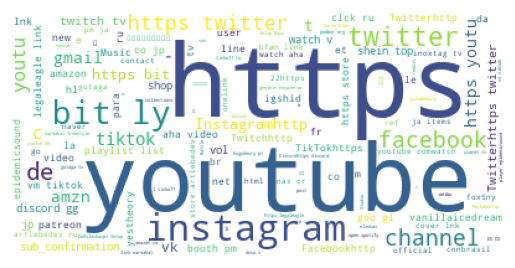

In [20]:
img = WordCloud(background_color='white').generate(''.join(top_25_words))
plt.imshow(img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

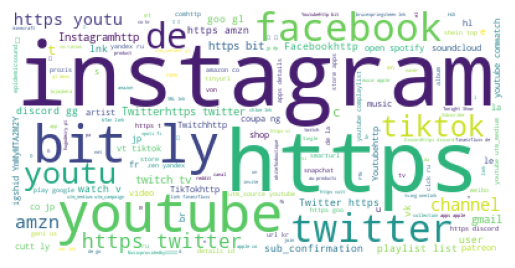

In [21]:
img = WordCloud(background_color='white').generate(''.join(outside_25_words))
plt.imshow(img)
plt.axis('off')

In [22]:
len(word_vault)

228022

In [23]:
top_25_words_freq = pd.Series(top_25_words).value_counts()
outside_25_words_freq = pd.Series(outside_25_words).value_counts()
all_words_freq = pd.Series(word_vault).value_counts()

In [24]:
df.cleaned_tags.apply(lambda x: len(x))

0       72
1        7
2       12
3       41
4       25
        ..
2014    29
2015     2
2016     1
2017     2
2018     2
Name: cleaned_tags, Length: 2019, dtype: int64

In [25]:
df[df.title_in_description == 0 ]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,title_lengths,desc_lengths,tags_length,content_rate,views_per_sub
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,"{MC, 공주, 민경훈, 인기가요, 신동, 아는, 김희철, 누드, 멤버, 미모서열,...","{저녁, ↗, #, 멋짐, 사, 공홈에서, 토크하이라이트, 5인, #여자아이들 #,...",0,0,0.013889,79,200,325,0.985994,0.497248
1,pY628jRd6gM,USSF-44 Mission,2022-11-01 13:54:07+00:00,SpaceX,Science_Technology,2022-11-02 00:00:00+00:00,SpaceX Space Satellite Mission Starlink Falcon 9,681721,34310,1017,...,"{9, Falcon, Space Satellite Mission Starlink F...","{separation, 9:37, Kennedy, Station, LZ-2, LC-...",0,0,0.285714,15,558,48,0.082005,0.111211
2,DGClFUvbnOg,Alpha Betas - The Zombie Deathrun (Episode 3),2022-10-31 19:15:11+00:00,Alpha Betas,Gaming,2022-11-02 00:00:00+00:00,alpha betas episode 2 alpha betas episode 3 al...,423690,41565,1011,...,"{wildcat, terroriser, 3, 2, episode, courage, ...","{arrogant, Marcel, powering, Farm, be, Known, ...",0,0,0.000000,45,1184,137,0.030912,1.303662
3,m8XmF1S-Jxw,Смертельная давка в Сеуле / Собчак бежала из Р...,2022-11-02 00:05:23+00:00,Артемий Лебедев,News_Politics,2022-11-02 00:00:00+00:00,Артемий Лебедев Лебедев Артемий Лебедев отвеча...,315692,21316,2122,...,"{Кира, Тиньков, Сеуле, новостей, Cybertruck, г...","{Артем, Лайтнинга, гражданства01:39:54, Украин...",0,0,0.219512,89,4849,303,0.122855,0.358334
4,4xl9KfUg8Lc,Pathaan | Official Teaser | Shah Rukh Khan | D...,2022-11-02 05:31:19+00:00,YRF,Film_Animation,2022-11-02 00:00:00+00:00,shah rukh khan shahrukh khan srk shah rukh kha...,8362197,822847,78832,...,"{shah, pathan, john abraham, teaser, 2022, kha...","{Shah, Raj, Credits, ChopraDirector, a very sp...",0,0,0.000000,94,1454,459,0.565682,0.170657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,kLuzD9SoiEU,Encontramos las ESCALERAS de HACKERS MÁS ALTAS...,2022-10-21 17:03:29+00:00,RaptorGamer,Gaming,2022-11-02 00:00:00+00:00,raptor raptorgamer gamer RAPTOR invictor escal...,1902762,78690,1712,...,"{pro, invictor, #, raptor, gamer, escalera hac...","{Tok, https://raptorgamer.com, https://www.tik...",0,0,0.068966,86,1313,327,0.552414,0.153449
2015,iDBRKLjfJS4,망한 모텔 사서 한 달에 4천만원 버는 38살 사장님,2022-10-09 09:34:15+00:00,탐구생활 - 돈이 되는 삶의 이야기,People_Blogs,2022-11-02 00:00:00+00:00,[none],1835677,12011,1015,...,"{[, none}","{운영하는, 대표님입니다탐구생활, 여인욱, tamgu-life@naver.com, ...",0,0,0.000000,29,54,0,0.081244,5.718620
2016,WRr0EDTrDx8,【プロ】バレー第1回目のゲストが本気すぎたんだけど、、、,2022-10-23 11:00:11+00:00,スカイピース,People_Blogs,2022-11-02 00:00:00+00:00,スカイピース,1976426,48816,3060,...,{スカイピース},"{(じん)じんたん, テオくん, -馬面, https://twitter.com/skyp...",0,0,1.000000,28,1517,6,0.794526,0.426874
2017,j-3Tpmi7CCk,"Pabllo Vittar, Gloria Groove - AMEIANOITE (Off...",2022-10-21 02:59:03+00:00,Pabllo Vittar,Music,2022-11-02 00:00:00+00:00,[none],1529830,114260,11625,...,"{[, none}","{more, vídeos, https://PablloVittar.lnk.to/vid...",0,0,0.000000,64,352,0,0.061992,0.198165


In [26]:
df.loc[0, 'cleaned_tags']

{'MC',
 'Node',
 'Nxde',
 'Nxde직캠',
 'Nxde직캠 Node',
 '강호동',
 '거울',
 '거울치료',
 '공주',
 '공주병',
 '관심',
 '관종',
 '김영철',
 '김희철',
 '누드',
 '막내',
 '멤버',
 '미모서열',
 '미연',
 '미연공주',
 '미연아는형님',
 '민경훈',
 '민니',
 '민니아는형님',
 '변태는너야',
 '뿅망치',
 '사랑',
 '서장훈',
 '서장훈 김희철 민경훈',
 '소개',
 '소연',
 '슈화',
 '슈화아는형님',
 '슈화직캠',
 '슈화킬링파트',
 '신동',
 '아는',
 '아는형님레전드',
 '아는형님아이돌',
 '아는형님아이돌 슈화킬링파트',
 '아이들',
 '아이들아는형님',
 '아이들저작권',
 '아이들토크',
 '애정',
 '언니',
 '여자아이들',
 '여자아이들Nxde',
 '여자아이들누드',
 '여자아이들아는형님',
 '여자아이들아는형님 아이들아는형님 슈화아는형님 전소연아는형님 미연아는형님',
 '여자아이들컴백',
 '연예인썰',
 '왕',
 '외국인',
 '우기',
 '우기아는형님',
 '음악방송',
 '음악중심',
 '이상민',
 '이수근',
 '이진호',
 '인기가요',
 '전소연아는형님',
 '파워풀',
 '파워풀 파트분배',
 '파트',
 '파트배분',
 '파트분배',
 '프로듀서',
 '학교',
 '형님'}

## We can target placing videos in/out of the top 25 


## Convert Duration

# Exploration

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:>

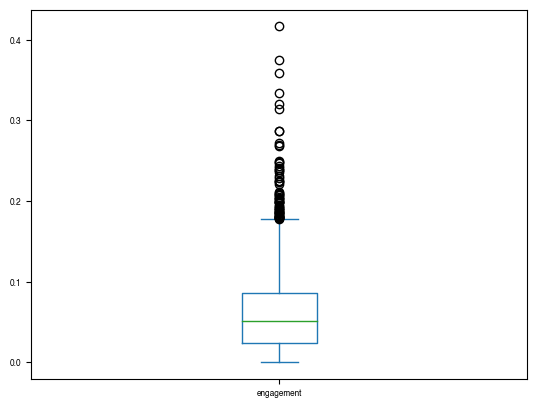

In [28]:
df.engagement.plot.box()

<AxesSubplot:>

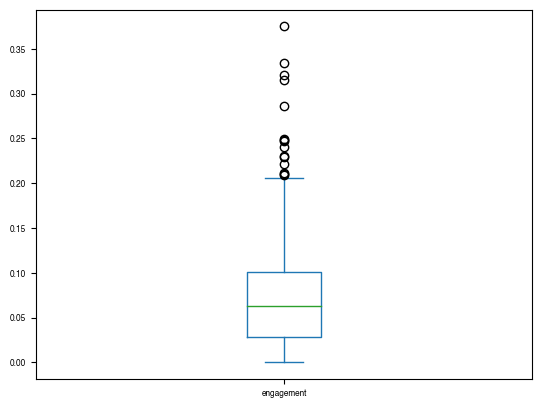

In [29]:
df[df.top_25 == 1].engagement.plot.box()

<AxesSubplot:>

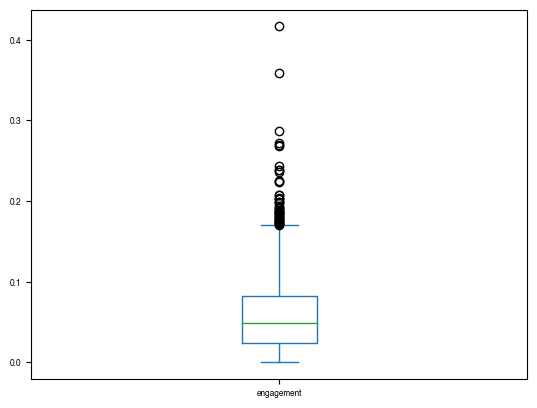

In [30]:
df[df.top_25 != 1].engagement.plot.box()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

## Takeaways
* engagement higher with top 25 videos

In [32]:
df.engagement = df.engagement.astype(float)

In [33]:
df.engagement

0       0.020506
1       0.056296
2       0.107647
3       0.094408
4       0.136110
          ...   
2014    0.044955
2015    0.008755
2016    0.030892
2017    0.105084
2018    0.098487
Name: engagement, Length: 2019, dtype: float64

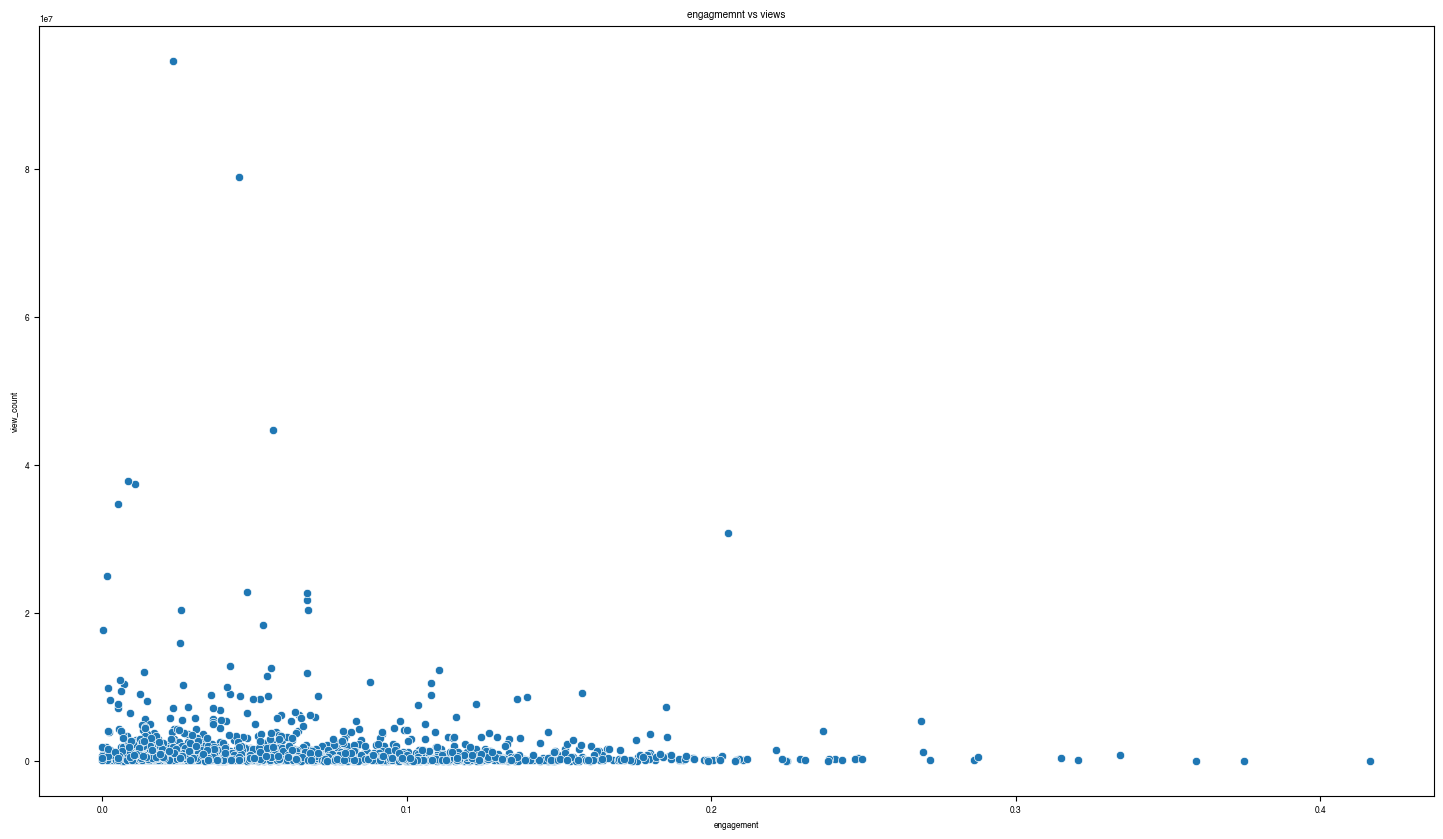

In [34]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='engagement',y='view_count')
plt.title('engagmemnt vs views')
plt.show()

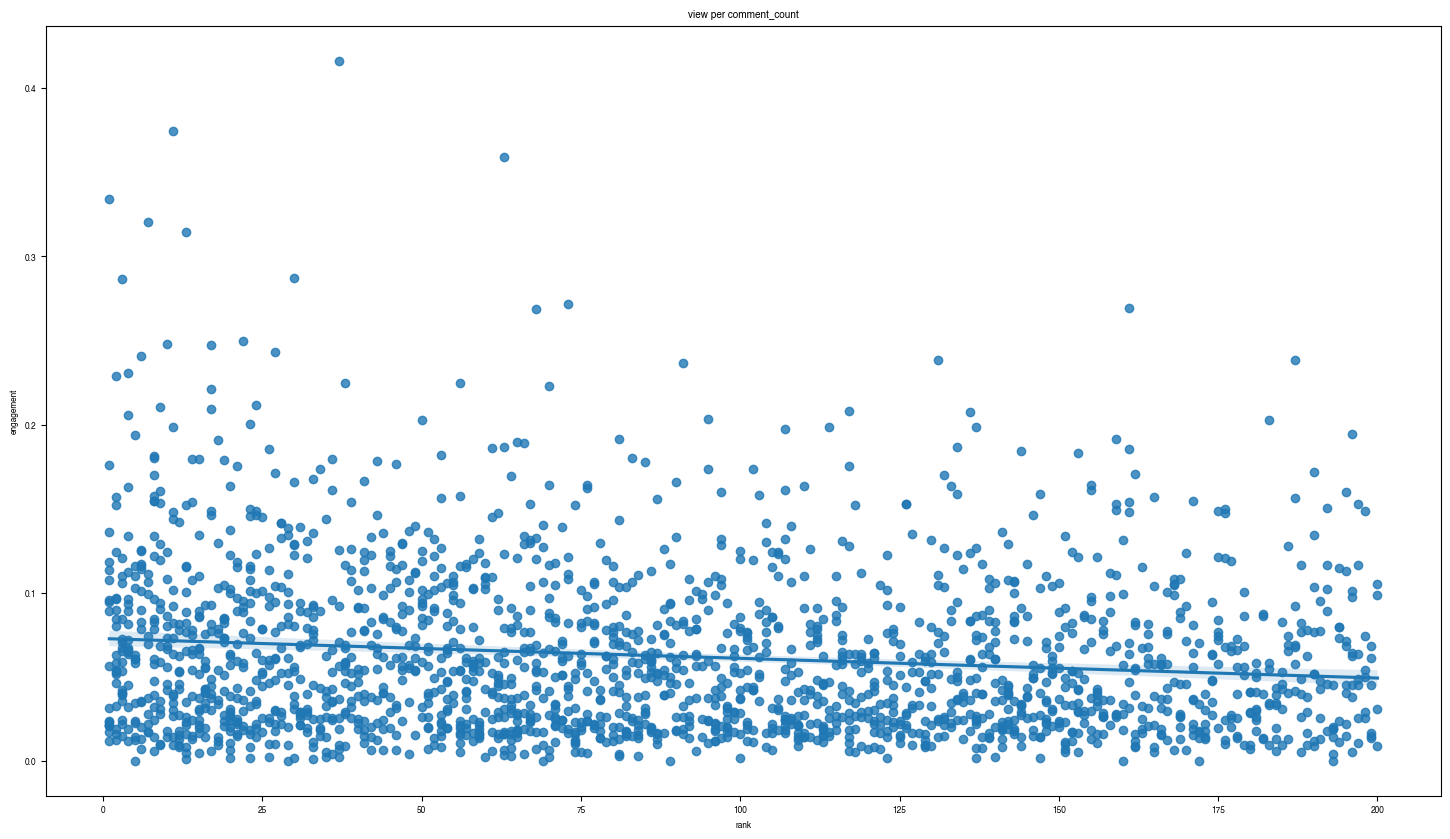

In [35]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='engagement')
plt.title('view per comment_count')
plt.show()

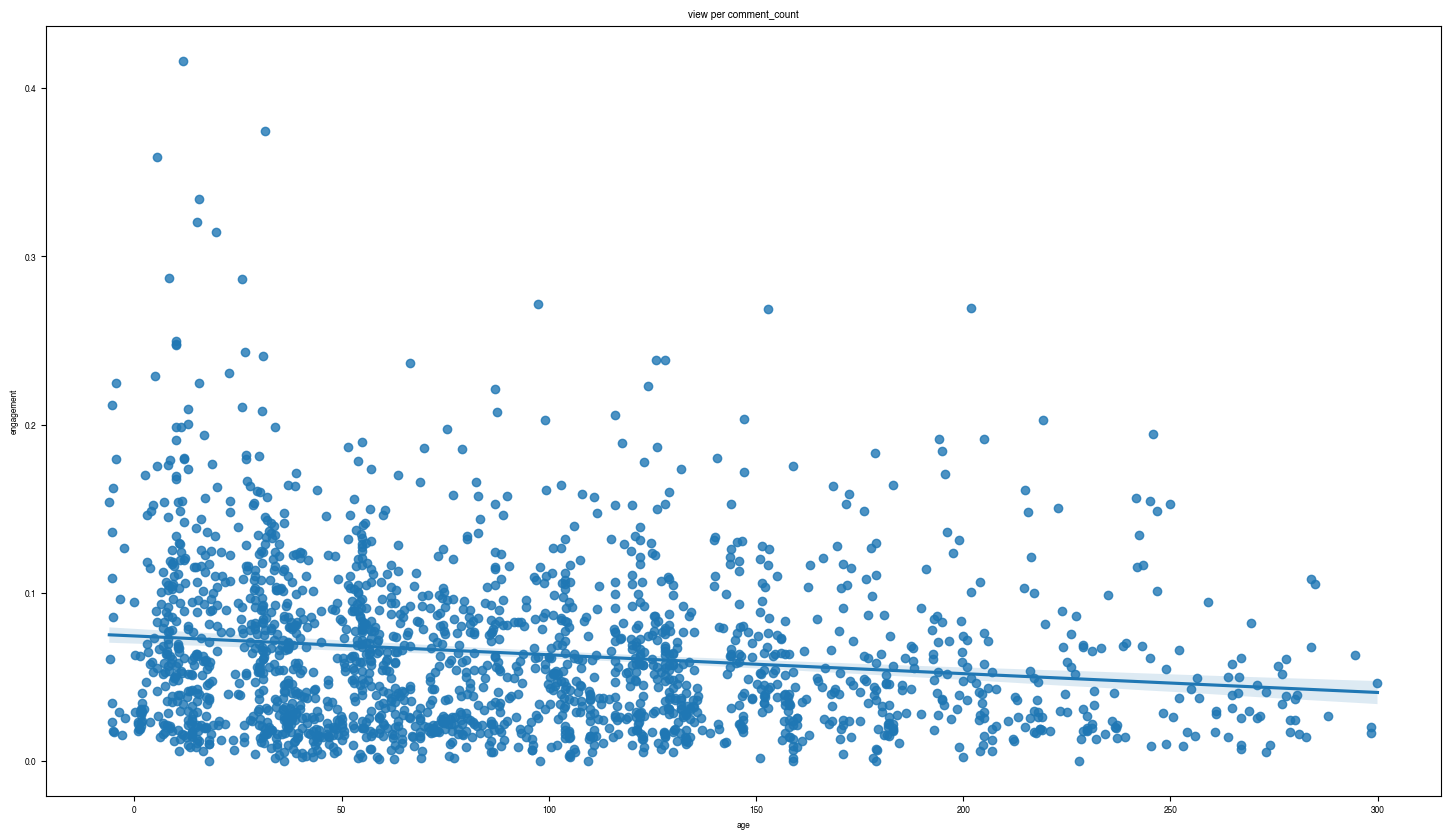

In [36]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.age < 300],x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

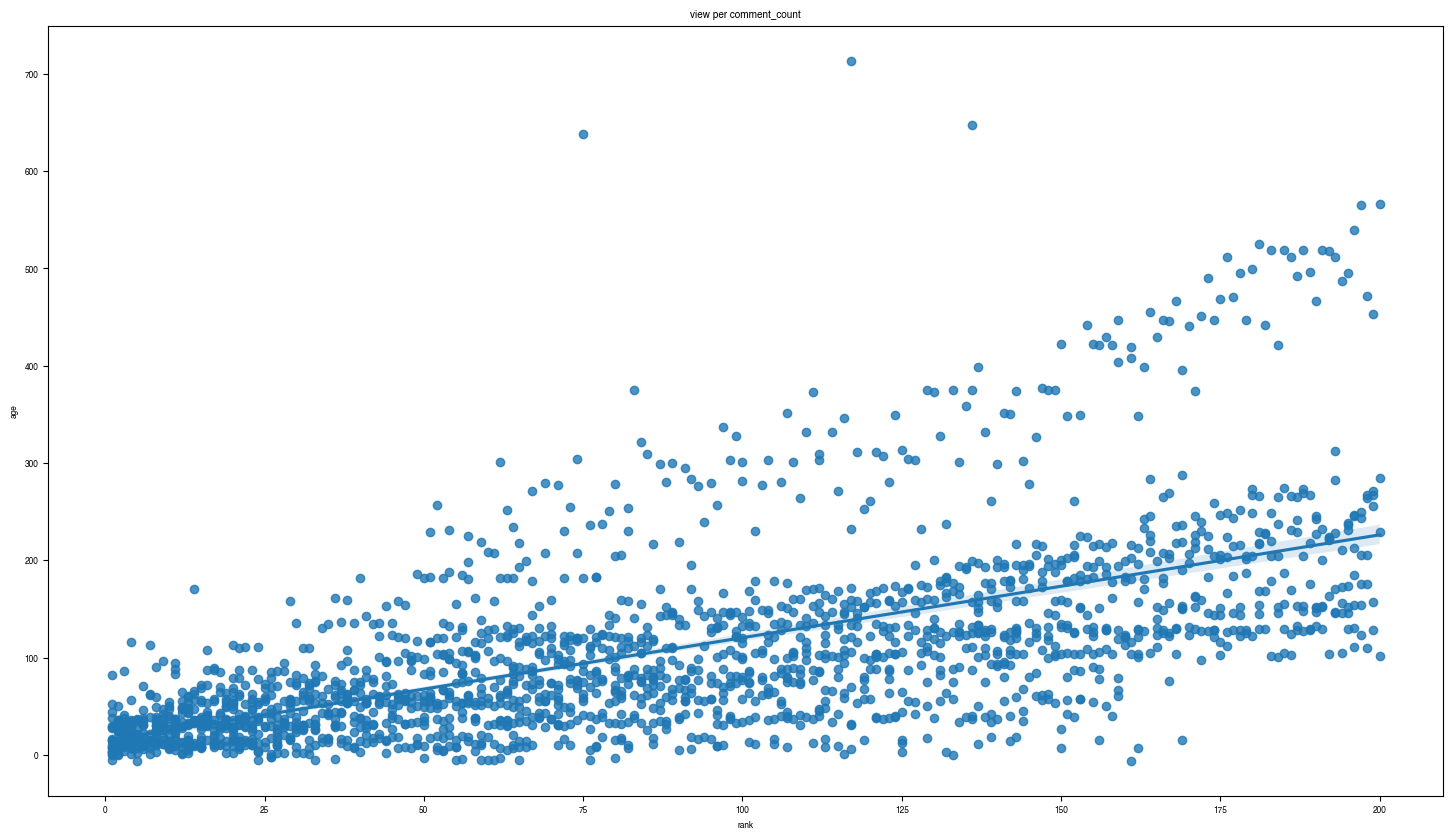

In [37]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

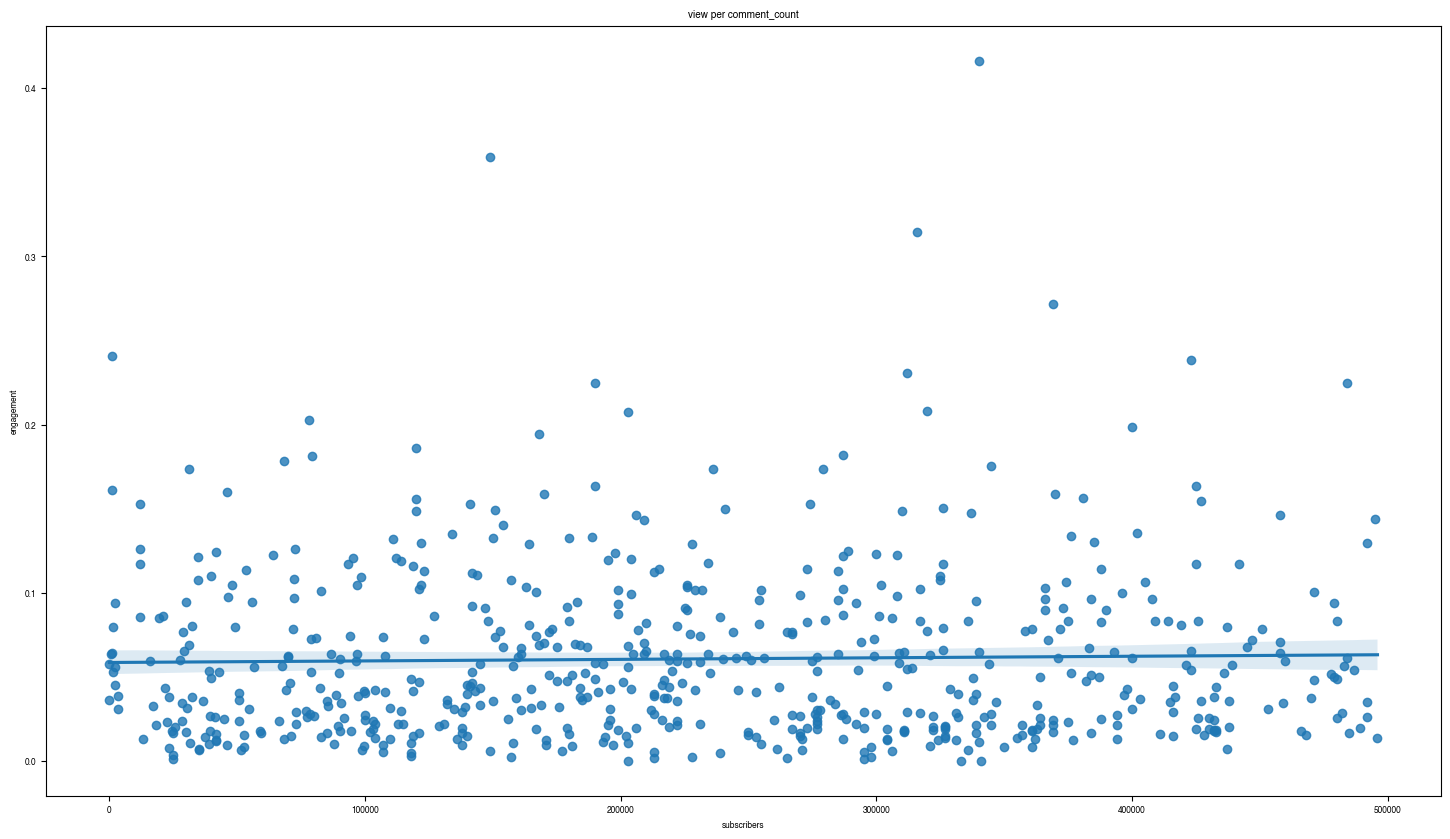

In [38]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.subscribers<500000],x='subscribers',y='engagement')
plt.title('view per comment_count')
plt.show()

In [39]:
df.select_dtypes('number').columns

Index(['view_count', 'likes', 'comment_count', 'duration', 'rank', 'top_25',
       'channel_age', 'subscribers', 'video_count', 'age', 'engagement',
       'sponsored', 'num_of_tags', 'title_in_description', 'title_in_tags',
       'pct_tags_in_description', 'title_lengths', 'desc_lengths',
       'tags_length', 'content_rate', 'views_per_sub'],
      dtype='object')

<AxesSubplot:>

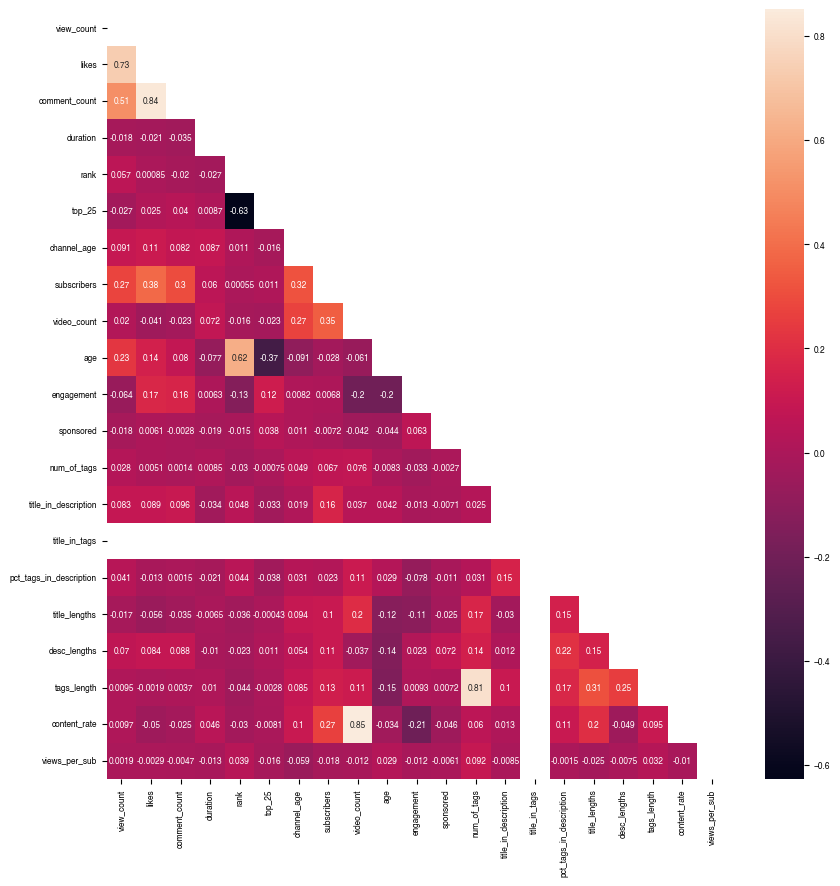

In [40]:

plt.figure(figsize=(10,10))

sns.heatmap(data=df.select_dtypes('number').corr(), \
    mask=np.triu(df.select_dtypes('number').corr()),\
    annot=True)


<AxesSubplot:ylabel='Frequency'>

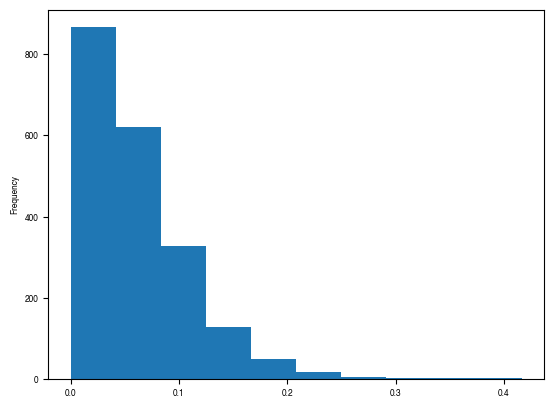

In [41]:
df.engagement.plot.hist()

<AxesSubplot:ylabel='Frequency'>

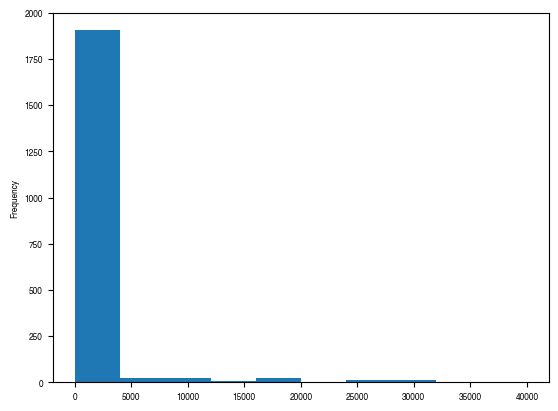

In [42]:
df.duration.plot.hist()

In [43]:
top_25 = df[df.top_25 == 1].copy()
outside_25 = df[df.top_25 != 1].copy()

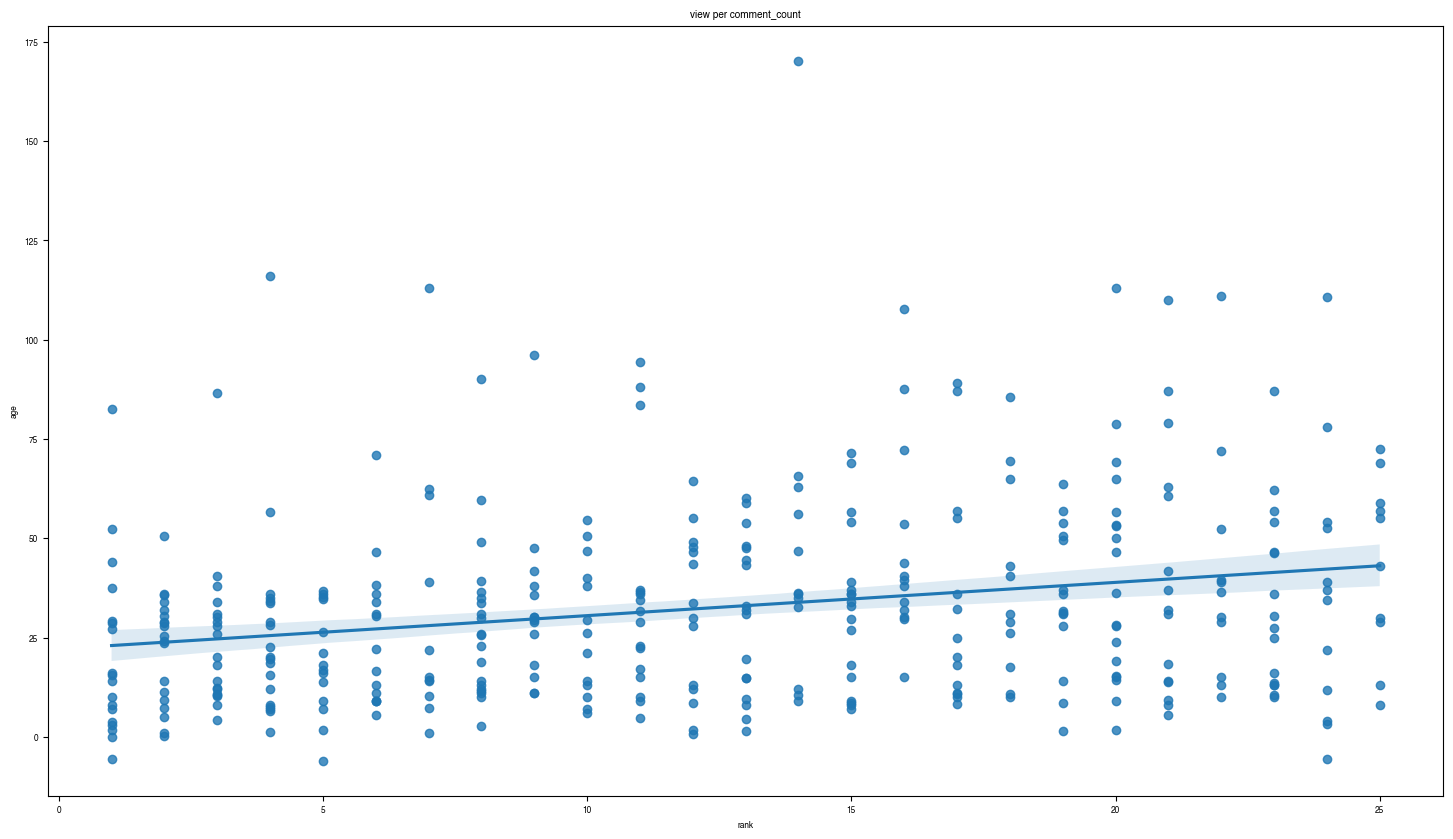

In [44]:
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

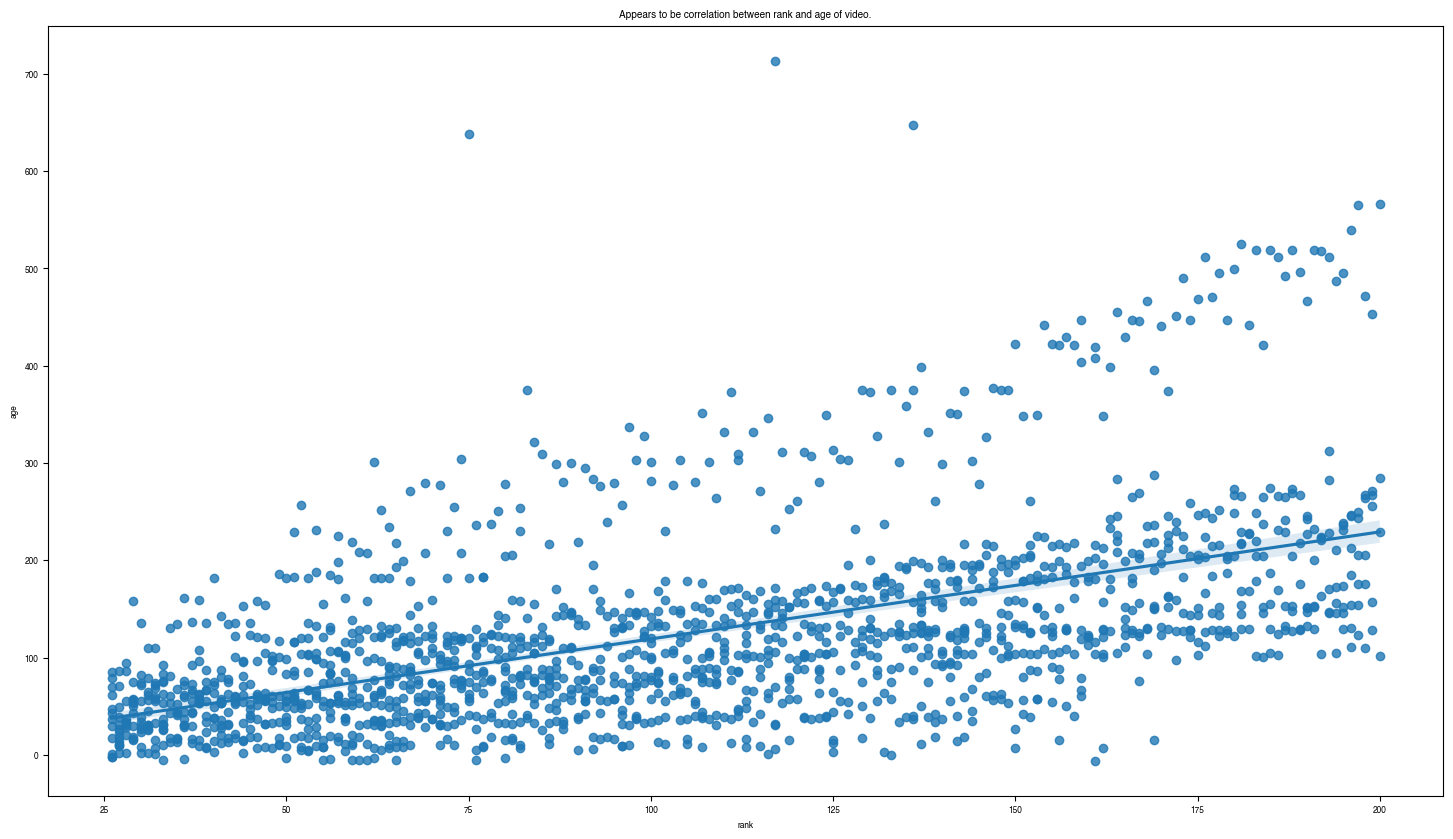

In [45]:
plt.figure(figsize=(18,10))
sns.regplot(data=outside_25,x='rank',y='age')
plt.title('Appears to be correlation between rank and age of video.')
plt.show()

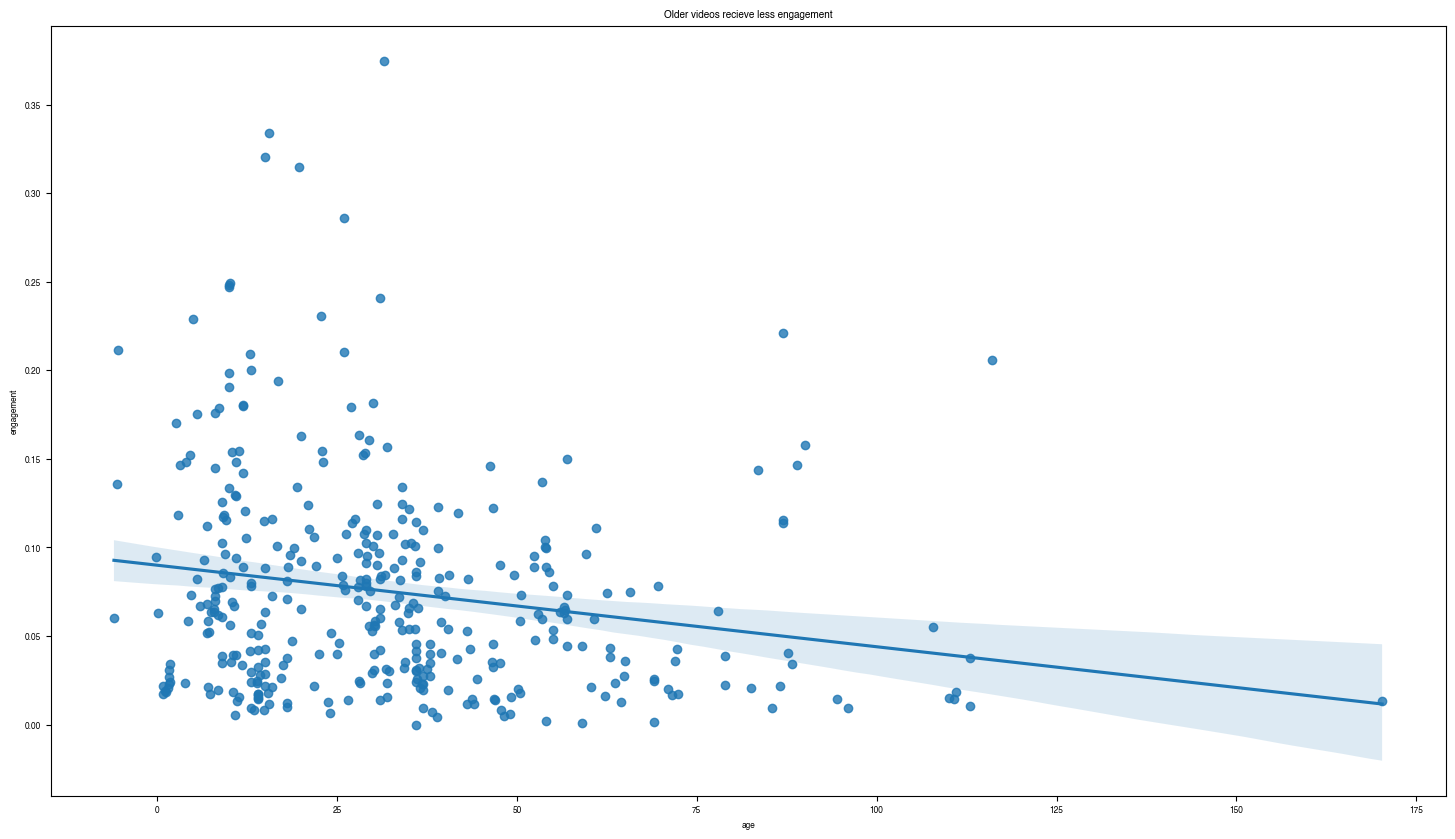

In [46]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='age',y='engagement')
plt.title('Older videos recieve less engagement')
plt.show()

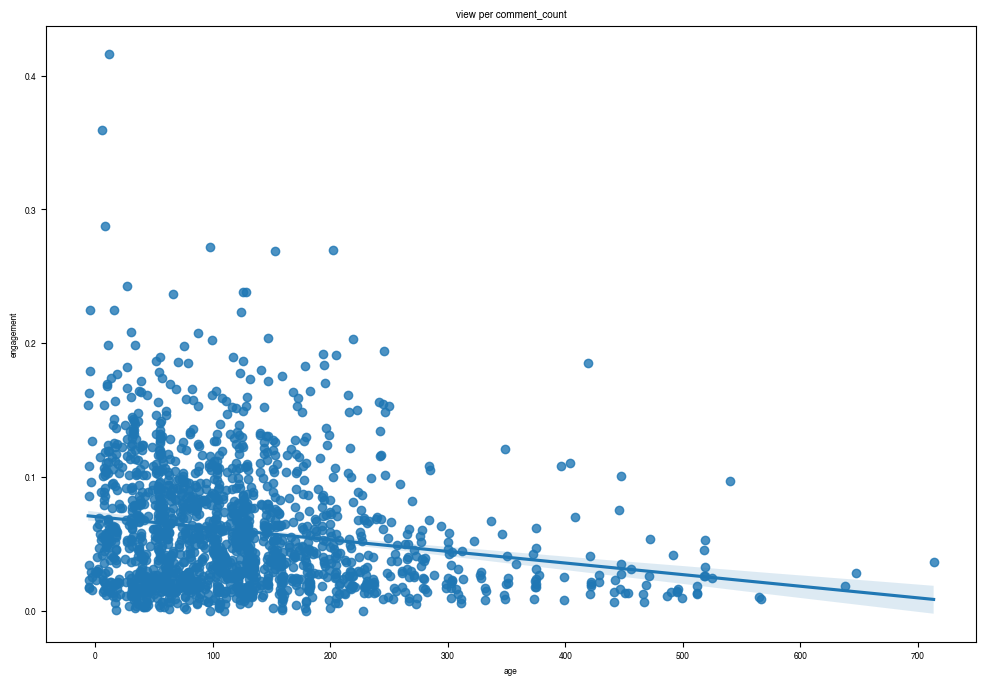

In [47]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(12,8))
sns.regplot(data=outside_25,x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

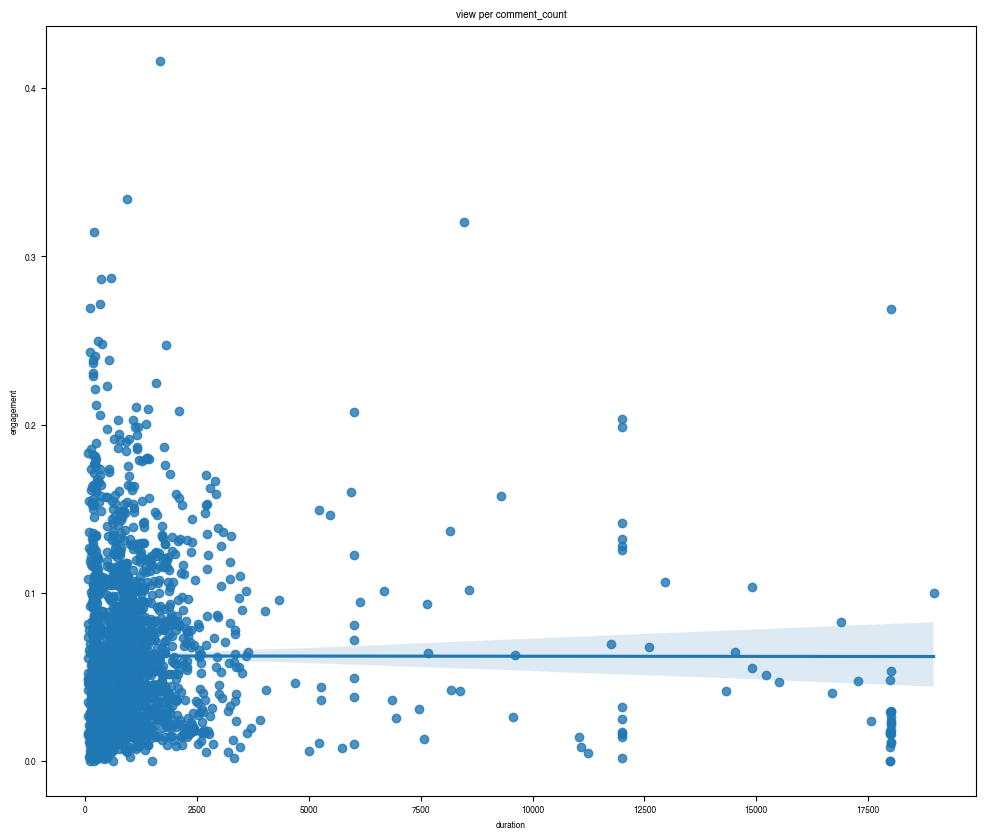

In [48]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(12,10))
sns.regplot(data=df[df.duration < 20000],x='duration',y='engagement')
plt.title('view per comment_count')
plt.show()

In [49]:

# import necessary libraries
import pandas as pd
import os
import glob
  
def acquire ():
    # use glob to get all the csv files 
    # in the folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    testy = pd.DataFrame()  
    # loop over the list of csv files
    for f in csv_files:
        
        # read the csv file
        pesty = pd.read_csv(f)
        
        # print the location and filename
        print('Location:', f)
        print('File Name:', f.split("\\")[-1][-13:-11])
        pesty['region']=f.split("\\")[-1][-13:-11]
        print(pesty.region)

        testy= pd.concat([testy, pesty])
        
        # print the content
        # print('Content:')
        # display(df)
        # print()

    return testy

---
# Phase Two

## Channel Age
Min age of channel with trending and top 25 

Max age of channel with trending and top 25 

Avg age of channels with trending and top 25 


In [50]:
df.channel_age = pd.to_datetime(df.channel_age, utc=True)
fresh = pd.to_datetime('2022-11-02', utc=True)
df.channel_age = abs(fresh - df.channel_age)
df.channel_age = df.channel_age.dt.days

In [51]:
df.channel_age.describe()

count     2019.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

In [52]:
df.channel_age.median()

19297.0

In [53]:
mask = df.top_25 == 1

In [54]:
df[mask].channel_age.describe()

count      374.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

In [55]:
df[~mask].channel_age.describe()

count     1645.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

## Subscriber count   
What percent of subscribers is the view count? Or is it a multiplier?  
Sub v Engagement: do channels with higher sub counts have more engagement


In [56]:
df[['view_count', 'subscribers']]

,view_count,subscribers
0,1098919,2210000
1,681721,6130000
2,423690,325000
3,315692,881000
4,8362197,49000000
...,...,...
2014,1902762,12400000
2015,1835677,321000
2016,1976426,4630000
2017,1529830,7720000


In [57]:
df['views_per_sub'] = df.view_count/df.subscribers

In [58]:
df.views_per_sub.describe()

count    2019.000000
mean        9.238918
std       223.058439
min         0.007329
25%         0.155500
50%         0.370158
75%         0.930189
max      9527.315789
Name: views_per_sub, dtype: float64

In [59]:
df[mask].views_per_sub.describe()

count    374.000000
mean       1.585702
std       11.765638
min        0.007855
25%        0.149078
50%        0.322632
75%        0.768287
max      222.530088
Name: views_per_sub, dtype: float64

In [60]:
df[~mask].views_per_sub.describe()

count    1645.000000
mean       10.978919
std       247.034978
min         0.007329
25%         0.160285
50%         0.376449
75%         0.991794
max      9527.315789
Name: views_per_sub, dtype: float64

## Channel Release Information

Do they have different categories in the top 25?  


In [61]:
df.channelTitle.value_counts()

Vijay Television                6
Sun TV                          6
BT Sport                        6
beIN SPORTS France              6
DAZN UEFA Champions League      5
                               ..
Mainstreet Records              1
Darryl Mayes                    1
Wall Poster Cinema              1
АТН: новости Беларуси и мира    1
Pabllo Vittar                   1
Name: channelTitle, Length: 1679, dtype: int64

In [62]:
df[['channelTitle', 'categoryId']].value_counts().head(60)

channelTitle                 categoryId   
beIN SPORTS France           Sports           6
BT Sport                     Sports           6
Vijay Television             Entertainment    6
Sun TV                       Entertainment    6
HAR PAL GEO                  Entertainment    5
Sony SAB                     Entertainment    5
DAZN UEFA Champions League   Sports           5
ARY Digital HD               Entertainment    5
Problems                     Gaming           4
NBA                          Sports           4
Colors Rishtey               Entertainment    4
STAR भारत                    Entertainment    4
Sourav Joshi Vlogs           People_Blogs     4
StarPlus                     Entertainment    4
Матч ТВ                      Sports           4
Zee Tamil                    Entertainment    4
Enaldinho                    Entertainment    4
FORMULA 1                    Sports           4
Star Maa                     Entertainment    3
Hora do Faro                 Entertainment   

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

Do channels release trending videos in multiple categories? No

## Channel View counts
View count vs top 25 → do videos in top 25 have their channels viewed more


In [64]:
df.categoryId.value_counts()

Entertainment          531
Music                  298
Gaming                 288
Sports                 247
People_Blogs           241
Comedy                  98
News_Politics           83
Howto_Style             55
Autos_Vehicles          43
Film_Animation          42
Education               37
Science_Technology      28
Travel_Events           19
Pets_Animals             7
Nonprofits_Activism      2
Name: categoryId, dtype: int64

## Video count
How many views per videos?  
Videos vs age .. what is their release count vs age of channel 


In [65]:
#df['views_per_video'] = df.view_count / df.video_count
df['content_rate'] = df.video_count / df.channel_age

In [66]:
df.content_rate.describe()

count    2019.000000
mean        0.251434
std         0.806983
min         0.000052
25%         0.008006
50%         0.025496
75%         0.096051
max        14.857698
Name: content_rate, dtype: float64

In [67]:
df[mask].views_per_sub.describe()

count    374.000000
mean       1.585702
std       11.765638
min        0.007855
25%        0.149078
50%        0.322632
75%        0.768287
max      222.530088
Name: views_per_sub, dtype: float64

In [68]:
df[~mask].content_rate.describe()

count    1645.000000
mean        0.260097
std         0.833335
min         0.000052
25%         0.007773
50%         0.025755
75%         0.101829
max        14.857698
Name: content_rate, dtype: float64

## Translation
### Basic exploration 


# Data Dictionary Creation

 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 non-null   bool               
 12  ratings_disabled         2019 non-null   bool               
 13  description              2019 non-null   object             
 14  duration                 2019 non-null   int64              
 15  captions                 2019 non-null   bool               
 16  region                   2019 non-null   object             
 17  rank                     2019 non-null   int64              
 18  top_25                   2019 non-null   int64              
 19  channel_age              2019 non-null   int64              
 20  subscribers              2019 non-null   int64              
 21  video_count              2019 non-null   int64              
 22  age                      2019 non-null   float64            
 23  engagement               2019 non-null   float64            
 24  sponsored                2019 non-null   int64              
 25  num_of_tags              2019 non-null   int64              
 26  word_bank                2019 non-null   object             
 27  cleaned_tags             2019 non-null   object             
 28  cleaned_desc             2019 non-null   object             
 29  title_in_description     2019 non-null   int64              
 30  title_in_tags            2019 non-null   int64              
 31  pct_tags_in_description  2019 non-null   float64            
 32  title_lengths            2019 non-null   int64              
 33  desc_lengths             2019 non-null   int64              
 34  tags_length              2019 non-null   int64              
 35  views_per_sub            2019 non-null   float64            
 36  content_rate             2019 non-null   float64     

In [69]:
#pd.read_clipboard().to_markdown()

EmptyDataError: No columns to parse from file

# Engagement Vs Categories

In [72]:
engagement_by_cat = df.groupby('categoryId').mean()['engagement']

In [81]:
round(engagement_by_cat *100, 2)

categoryId
Autos_Vehicles          6.48
Comedy                  7.69
Education               7.24
Entertainment           5.68
Film_Animation          5.82
Gaming                  7.35
Howto_Style             5.02
Music                   7.65
News_Politics           4.54
Nonprofits_Activism    17.17
People_Blogs            6.72
Pets_Animals            5.28
Science_Technology      8.31
Sports                  3.73
Travel_Events           7.68
Name: engagement, dtype: float64

In [77]:
count_by_cat = df.categoryId.value_counts(normalize=True)

In [82]:
round(pd.concat([count_by_cat, engagement_by_cat*100], axis=1),2)

,categoryId,engagement
Entertainment,0.26,5.68
Music,0.15,7.65
Gaming,0.14,7.35
Sports,0.12,3.73
People_Blogs,0.12,6.72
Comedy,0.05,7.69
News_Politics,0.04,4.54
Howto_Style,0.03,5.02
Autos_Vehicles,0.02,6.48
Film_Animation,0.02,5.82
